# Muhahaha

In [3]:
from model import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import *
from sklearn.metrics import silhouette_score
import gmaps
import gmaps.datasets

In [ ]:
def 

In [4]:
df_commute = pd.read_csv('data/commute_data.csv')
df_tracts = pd.read_csv('data/census_tracts_2010.csv')
df_tracts = df_tracts.rename(columns=lambda x: x.strip())

# Merge on OFIPS = GEOID (federal representation of census tract ID)
df_merged = df_commute.merge(df_tracts, how='inner', left_on='OFIPS', right_on='GEOID')
df_merged = df_merged.merge(df_tracts, how='inner', left_on='DFIPS', right_on='GEOID', suffixes = ('_O','_D'))

df_bayarea = limit_area(df_merged, minlat=37.5, maxlat=38, minlong=-122.75, maxlong=-122.25)

df_distance_matrix = create_distance_matrix(df_bayarea, method='absolute')
linkage_method = 'complete'
Z = linkage(df_distance_matrix, linkage_method)

Z_df = pd.DataFrame(Z).astype('int')

k = 2
f_cluster = fcluster(Z,k,criterion='maxclust')
df_results = pd.DataFrame(index = df_distance_matrix.columns, data=f_cluster)
df_results = df_results.rename(columns={0: 'cluster_id'})
df_results = df_results.merge(df_tracts, left_index=True, right_on='GEOID')

df_results_2 = df_results.copy().reset_index()
step_0 = df_results_2.merge(Z_df, how='left', left_index=True, right_on=0).set_index(0)
step_1 = df_results_2.merge(Z_df, how='left', left_index=True, right_on=1).set_index(1)
df_results_2['hc_level']=step_0[3].fillna(step_1[3])
df_results_2['alpha'] = 1.5/df_results_2['hc_level']

cluster_order = list(df_results_2.groupby('cluster_id').count().sort_values('GEOID', ascending=False).index)

from matplotlib import cm
colors = []
for i, val in enumerate(cluster_order):
    (r, g, b, a) = cm.Dark2(i%8)
    colors.append([val,r, g, b])
#colors = np.array(colors)
colors = pd.DataFrame(colors, columns=['cluster_id','r','g','b'])

#color_array = np.array(df_results_2[['r', 'g', 'b', 'alpha']])

df_results_2 = df_results_2.merge(colors, on='cluster_id')

color_array = []
for i, row in df_results_2.iterrows():
    r, g, b, a = row['r'], row['g'], row['b'], row['alpha']
    color_array.append([r, g, b, a])

NameError: name 'df_color' is not defined

<Figure size 1440x1440 with 0 Axes>

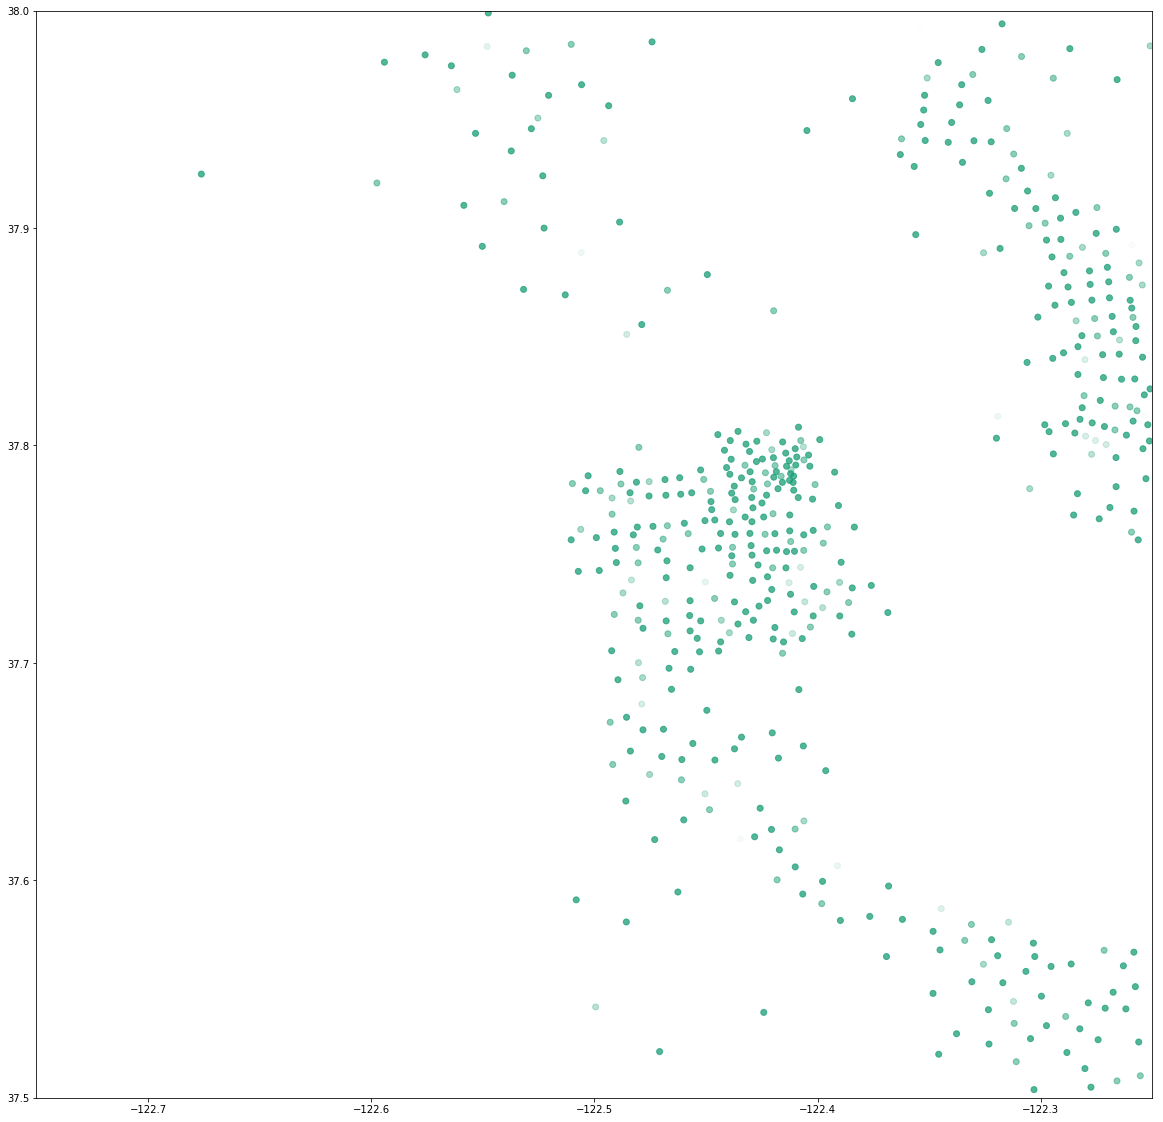

0.020918981649732726

In [6]:
plt.figure(figsize=(20,20))
plt.scatter(df_results_2['INTPTLONG'],df_results_2['INTPTLAT'], color=color_array)
#plt.ylim(36,38.5)
#plt.xlim(-123,-120.5)
plt.ylim(37.5,38)
plt.xlim(-122.75,-122.25)
plt.show()


silhouette_score(df_distance_matrix , f_cluster, metric='precomputed')

In [32]:
from plotting import *

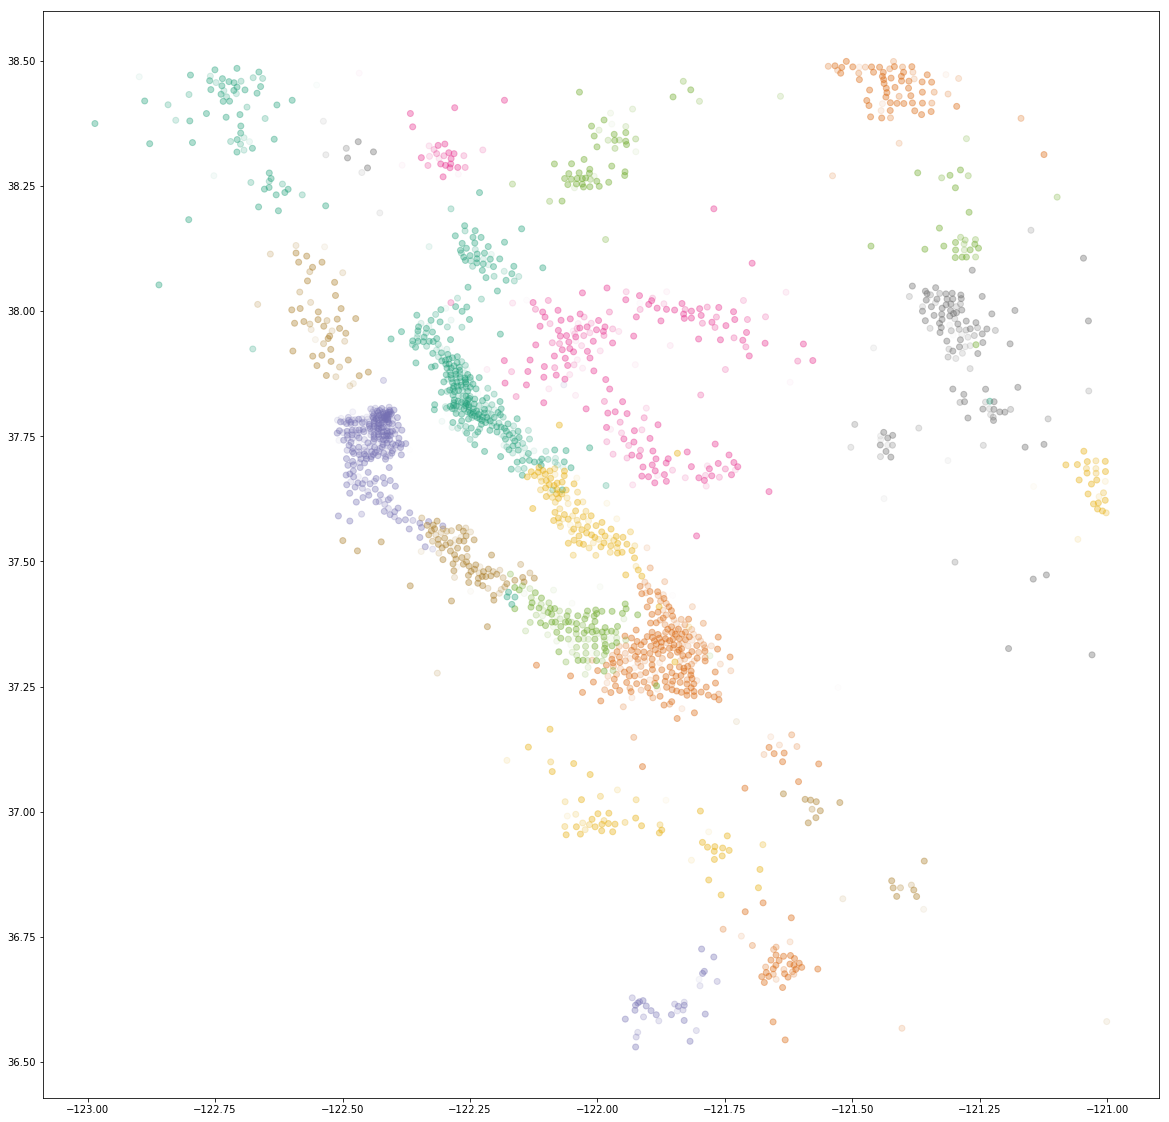

In [37]:
plot_bayarea(df_merged, df_tracts, dist_method='absolute', link_method='ward', k=25, alpha=0.7)

In [36]:
# Use google maps api
gmaps.configure(api_key=api_key) # Fill in with your API key
#Set up your map
fig = gmaps.figure()
colors = list(df_results['color'].values)
locations = list(zip(df_results['INTPTLAT'],df_results['INTPTLONG']))
symbols = gmaps.symbol_layer(
        locations,
        fill_color=colors,
        stroke_color=colors,
        scale=2)
fig.add_layer(symbols)
fig

NameError: name 'api_key' is not defined